In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
import datetime

In [2]:
df = pd.read_csv('MA_ppe_update.csv', index_col='Time', parse_dates=True)
daterange = pd.date_range(start='2020-04-29', end='2020-07-29', freq='7D')
daterange_ex = pd.date_range(start='2020-06-03', end='2020-06-17', freq='7D')
df = df[df.index.isin(daterange)]
df = df[~df.index.isin(daterange_ex)]
df

,Region,Entity,N95s/KN95s,Masks,Gowns,Gloves,Ventilators
Time,,,,,,,
2020-04-29,Massachusetts,Nursing home/Senior living,267285,600400,53525,489100,0
2020-04-29,Massachusetts,Hospital,200000,165200,21436,104000,675
2020-04-29,Massachusetts,Community health center,44550,69750,8013,53400,0
2020-04-29,Massachusetts,"Local Municipalities (e.g. Fire, Police, Publi...",122634,282141,119532,1060650,0
2020-04-29,Massachusetts,Public safety (30-day supply),167325,0,0,0,0
...,...,...,...,...,...,...,...
2020-07-29,State agency,EMS (Private),0,0,0,0,0
2020-07-29,State agency,Local BOH,0,0,0,0,0
2020-07-29,State agency,State agency,2642252,1299986,111408,3595997,0


# Massachusetts

In [3]:
MA = df[df['Region']=='Massachusetts']
MA

,Region,Entity,N95s/KN95s,Masks,Gowns,Gloves,Ventilators
Time,,,,,,,
2020-04-29,Massachusetts,Nursing home/Senior living,267285,600400,53525,489100,0
2020-04-29,Massachusetts,Hospital,200000,165200,21436,104000,675
2020-04-29,Massachusetts,Community health center,44550,69750,8013,53400,0
2020-04-29,Massachusetts,"Local Municipalities (e.g. Fire, Police, Publi...",122634,282141,119532,1060650,0
2020-04-29,Massachusetts,Public safety (30-day supply),167325,0,0,0,0
...,...,...,...,...,...,...,...
2020-07-29,Massachusetts,EMS (Private),38500,47900,3548,63600,0
2020-07-29,Massachusetts,Local BOH,16925,56700,2136,88000,0
2020-07-29,Massachusetts,State agency,2653785,1323836,122656,3695697,0


In [4]:
# Calculate distribution of PPE by entities for Massachusetts
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
Entities = ['Community health center', 'EMS (Private)', 'Hospital', 'Local BOH', 'Local Municipalities (e.g. Fire, Police, Public EMS)',
           'Nursing home/Senior living', 'Other (e.g. home and pediatric care)', 'Public safety (30-day supply)', 'State agency']
MA_N95 = MA[['Entity','N95s/KN95s']].pivot(columns='Entity', values='N95s/KN95s').astype(float)
MA_Masks = MA[['Entity','Masks']].pivot(columns='Entity', values='Masks').astype(float)
MA_Gloves = MA[['Entity','Gloves']].pivot(columns='Entity', values='Gloves').astype(float)
MA_Gowns = MA[['Entity','Gowns']].pivot(columns='Entity', values='Gowns').astype(float)

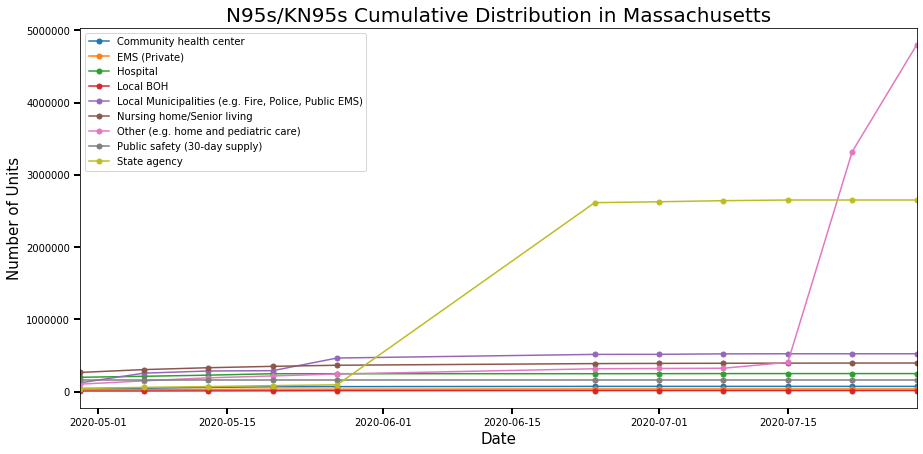

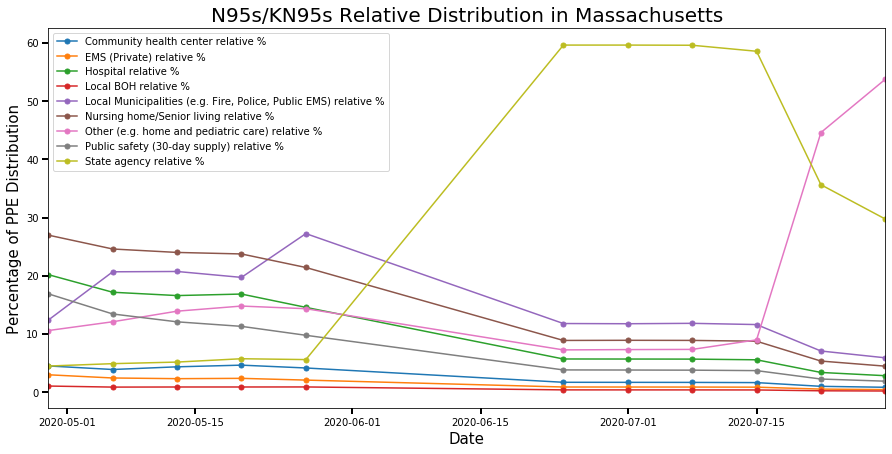

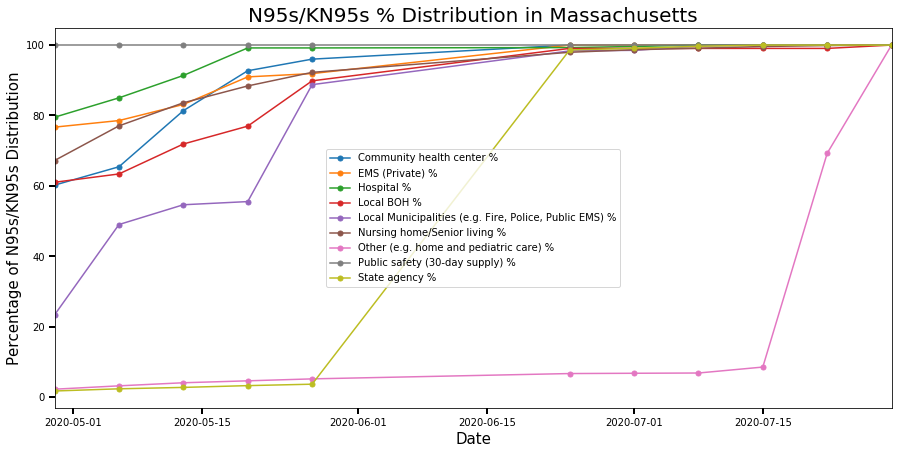

Entity,Community health center,EMS (Private),Hospital,Local BOH,"Local Municipalities (e.g. Fire, Police, Public EMS)",Nursing home/Senior living,Other (e.g. home and pediatric care),Public safety (30-day supply),State agency,Total,...,"Local Municipalities (e.g. Fire, Police, Public EMS) relative %","Local Municipalities (e.g. Fire, Police, Public EMS) %",Nursing home/Senior living relative %,Nursing home/Senior living %,Other (e.g. home and pediatric care) relative %,Other (e.g. home and pediatric care) %,Public safety (30-day supply) relative %,Public safety (30-day supply) %,State agency relative %,State agency %
Time,,,,,,,,,,,,,,,,,,,,,
2020-04-29,44550.0,29520.0,200000.0,10325.0,122634.0,267285.0,104811.0,167325.0,44376.0,990826.0,...,12.376946,23.318305,26.975978,67.189110,10.578144,2.184429,16.887425,100.0,4.478687,1.672178
2020-05-06,48410.0,30240.0,213840.0,10725.0,257634.0,306465.0,150639.0,167325.0,60919.0,1246197.0,...,20.673617,48.987950,24.592019,77.038033,12.087896,3.139557,13.426850,100.0,4.888392,2.295551
2020-05-13,60210.0,32000.0,229840.0,12165.0,287208.0,332545.0,192691.0,167325.0,71515.0,1385499.0,...,20.729571,54.611314,24.001822,83.593927,13.907697,4.015988,12.076876,100.0,5.161678,2.694830
2020-05-20,68610.0,35020.0,249540.0,13025.0,291948.0,351605.0,218983.0,167325.0,84945.0,1481001.0,...,19.712883,55.512604,23.741037,88.385159,14.786148,4.563955,11.298102,100.0,5.735648,3.200900
2020-05-27,71050.0,35380.0,249540.0,15205.0,466768.0,366965.0,245617.0,167325.0,95765.0,1713615.0,...,27.238791,88.753843,21.414670,92.246298,14.333266,5.119050,9.764445,100.0,5.588478,3.608619
2020-06-24,74010.0,38500.0,249780.0,16765.0,517198.0,389665.0,318237.0,167325.0,2617045.0,4388525.0,...,11.785235,98.342882,8.879179,97.952540,7.251571,6.632567,3.812784,100.0,59.633818,98.615562
2020-07-01,74010.0,38500.0,250580.0,16765.0,518048.0,392545.0,322097.0,167325.0,2629495.0,4409365.0,...,11.748812,98.504505,8.902529,98.676504,7.304839,6.713016,3.794764,100.0,59.634324,99.084704
2020-07-08,74010.0,38500.0,251580.0,16765.0,524393.0,394225.0,325597.0,167325.0,2644745.0,4437140.0,...,11.818266,99.710979,8.884664,99.098816,7.337992,6.785961,3.771010,100.0,59.604723,99.659354
2020-07-15,74010.0,38500.0,251580.0,16765.0,525913.0,396190.0,406727.0,167325.0,2653785.0,4530795.0,...,11.607521,100.000000,8.744382,99.592770,8.976946,8.476840,3.693060,100.0,58.572171,100.000000


In [5]:
# N95s/KN95s Distribution by Entities in MA
for entity in Entities:
    MA_N95['{} relative %'.format(entity)] = MA_N95[entity] / MA_N95['Total'] * 100
    MA_N95['{} %'.format(entity)] = MA_N95[entity] / MA_N95[entity].iloc[-1] * 100

fig1, ax1 = plt.subplots(1, 1, figsize=(15,7))
for entity in Entities:
    ax1.plot(MA_N95.index, entity, data=MA_N95, marker='.', markersize=10)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Units', fontsize=15)
ax1.set_xlim([datetime.date(2020,4,29), datetime.date(2020,7,29)])
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend()
ax1.set_title('N95s/KN95s Cumulative Distribution in Massachusetts', fontsize=20)

fig2, ax2 = plt.subplots(1, 1,figsize=(15,7))
for entity in Entities:
    ax2.plot(MA_N95.index, '{} relative %'.format(entity), data=MA_N95, marker='.', markersize=10)
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Percentage of PPE Distribution', fontsize=15)
ax2.set_xlim([datetime.date(2020,4,29), datetime.date(2020,7,29)])
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend()
ax2.set_title('N95s/KN95s Relative Distribution in Massachusetts', fontsize=20)

fig3, ax3 = plt.subplots(1, 1,figsize=(15,7))
for entity in Entities:
    ax3.plot(MA_N95.index, '{} %'.format(entity), data=MA_N95, marker='.', markersize=10)
ax3.set_xlabel('Date', fontsize=15)
ax3.set_ylabel('Percentage of N95s/KN95s Distribution', fontsize=15)
ax3.set_xlim([datetime.date(2020,4,29), datetime.date(2020,7,29)])
ax3.tick_params(direction='out', length=6, width=2, labelsize=10)
ax3.legend()
ax3.set_title('N95s/KN95s % Distribution in Massachusetts', fontsize=20)
plt.show()
MA_N95    

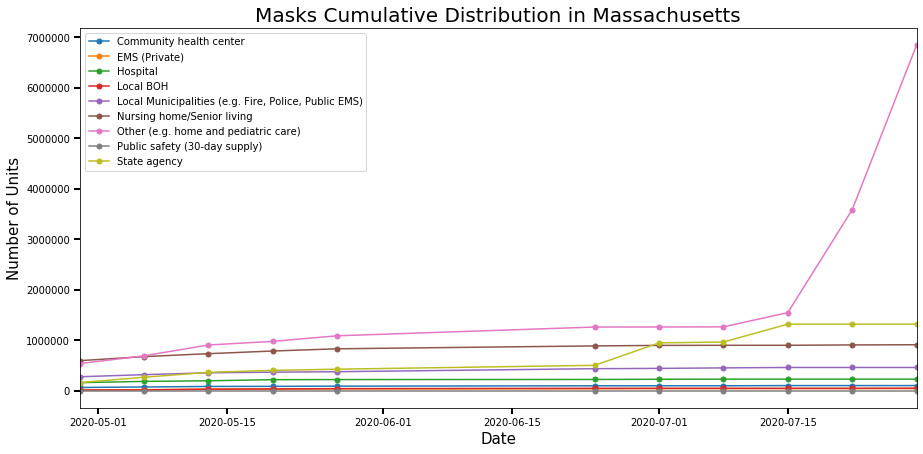

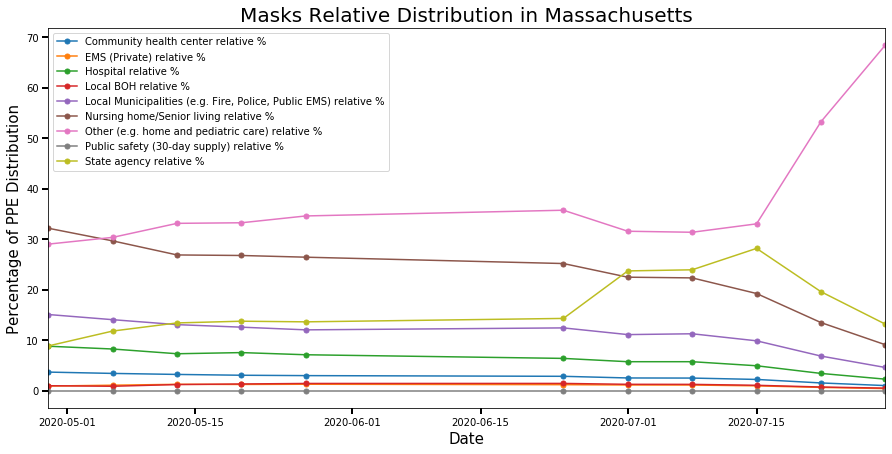

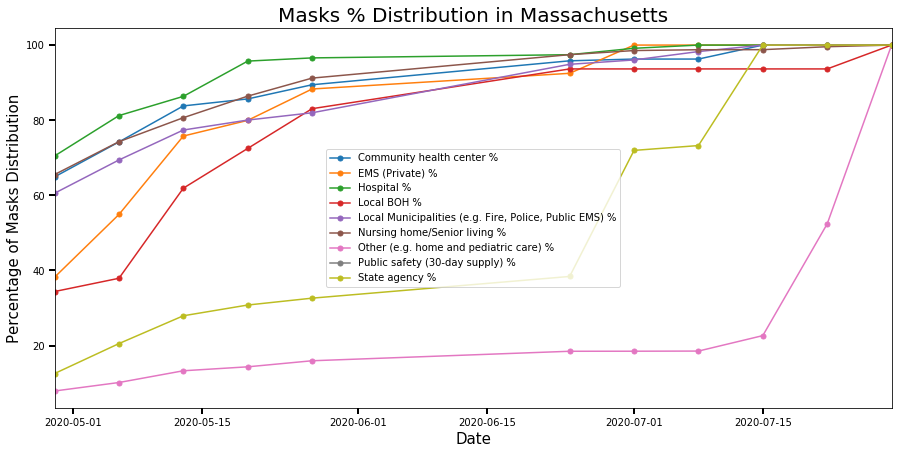

Entity,Community health center,EMS (Private),Hospital,Local BOH,"Local Municipalities (e.g. Fire, Police, Public EMS)",Nursing home/Senior living,Other (e.g. home and pediatric care),Public safety (30-day supply),State agency,Total,...,"Local Municipalities (e.g. Fire, Police, Public EMS) relative %","Local Municipalities (e.g. Fire, Police, Public EMS) %",Nursing home/Senior living relative %,Nursing home/Senior living %,Other (e.g. home and pediatric care) relative %,Other (e.g. home and pediatric care) %,Public safety (30-day supply) relative %,Public safety (30-day supply) %,State agency relative %,State agency %
Time,,,,,,,,,,,,,,,,,,,,,
2020-04-29,69750.0,18300.0,165200.0,19500.0,282141.0,600400.0,541863.0,0.0,166258.0,1863412.0,...,15.141096,60.558794,32.220464,65.527967,29.079076,7.911260,0.0,NaN,8.922235,12.558806
2020-05-06,79750.0,26300.0,190400.0,21500.0,323391.0,680600.0,696628.0,0.0,271858.0,2290427.0,...,14.119245,69.412702,29.714983,74.281037,30.414765,10.170846,0.0,NaN,11.869315,20.535625
2020-05-13,90050.0,36300.0,202400.0,35100.0,360546.0,739100.0,910798.0,0.0,369854.0,2744148.0,...,13.138723,77.387657,26.933679,80.665757,33.190557,13.297752,0.0,NaN,13.477917,27.938053
2020-05-20,92050.0,38300.0,224400.0,41100.0,372896.0,791700.0,982848.0,0.0,407736.0,2951030.0,...,12.636130,80.038464,26.827921,86.406548,33.305253,14.349690,0.0,NaN,13.816735,30.799585
2020-05-27,96100.0,42300.0,226400.0,47100.0,381946.0,835700.0,1093298.0,0.0,431936.0,3154780.0,...,12.106898,81.980957,26.489961,91.208731,34.655285,15.962272,0.0,NaN,13.691478,32.627606
2020-06-24,102950.0,44300.0,228400.0,53100.0,442046.0,892900.0,1266348.0,0.0,508436.0,3538480.0,...,12.492539,94.880832,25.233999,97.451569,35.787909,18.488821,0.0,NaN,14.368769,38.406268
2020-07-01,103450.0,47900.0,232400.0,53100.0,447446.0,902900.0,1267348.0,0.0,952686.0,4007230.0,...,11.165968,96.039889,22.531774,98.542974,31.626535,18.503421,0.0,NaN,23.774178,71.964050
2020-07-08,103450.0,47900.0,234400.0,53100.0,457846.0,904900.0,1269948.0,0.0,969686.0,4041230.0,...,11.329372,98.272147,22.391698,98.761255,31.424789,18.541382,0.0,NaN,23.994823,73.248197
2020-07-15,107450.0,47900.0,234400.0,53100.0,465896.0,905050.0,1551798.0,0.0,1323836.0,4689430.0,...,9.935024,100.000000,19.299787,98.777626,33.091399,22.656423,0.0,NaN,28.230211,100.000000


In [6]:
# Masks Distribution by Entities in MA
for entity in Entities:
    MA_Masks['{} relative %'.format(entity)] = MA_Masks[entity] / MA_Masks['Total'] * 100
    MA_Masks['{} %'.format(entity)] = MA_Masks[entity] / MA_Masks[entity].iloc[-1] * 100

fig1, ax1 = plt.subplots(1, 1, figsize=(15,7))
for entity in Entities:
    ax1.plot(MA_Masks.index, entity, data=MA_Masks, marker='.', markersize=10)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Units', fontsize=15)
ax1.set_xlim([datetime.date(2020,4,29), datetime.date(2020,7,29)])
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend()
ax1.set_title('Masks Cumulative Distribution in Massachusetts', fontsize=20)

fig2, ax2 = plt.subplots(1, 1,figsize=(15,7))
for entity in Entities:
    ax2.plot(MA_Masks.index, '{} relative %'.format(entity), data=MA_Masks, marker='.', markersize=10)
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Percentage of PPE Distribution', fontsize=15)
ax2.set_xlim([datetime.date(2020,4,29), datetime.date(2020,7,29)])
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend()
ax2.set_title('Masks Relative Distribution in Massachusetts', fontsize=20)

fig3, ax3 = plt.subplots(1, 1,figsize=(15,7))
for entity in Entities:
    ax3.plot(MA_Masks.index, '{} %'.format(entity), data=MA_Masks, marker='.', markersize=10)
ax3.set_xlabel('Date', fontsize=15)
ax3.set_ylabel('Percentage of Masks Distribution', fontsize=15)
ax3.set_xlim([datetime.date(2020,4,29), datetime.date(2020,7,29)])
ax3.tick_params(direction='out', length=6, width=2, labelsize=10)
ax3.legend()
ax3.set_title('Masks % Distribution in Massachusetts', fontsize=20)
plt.show()
MA_Masks    

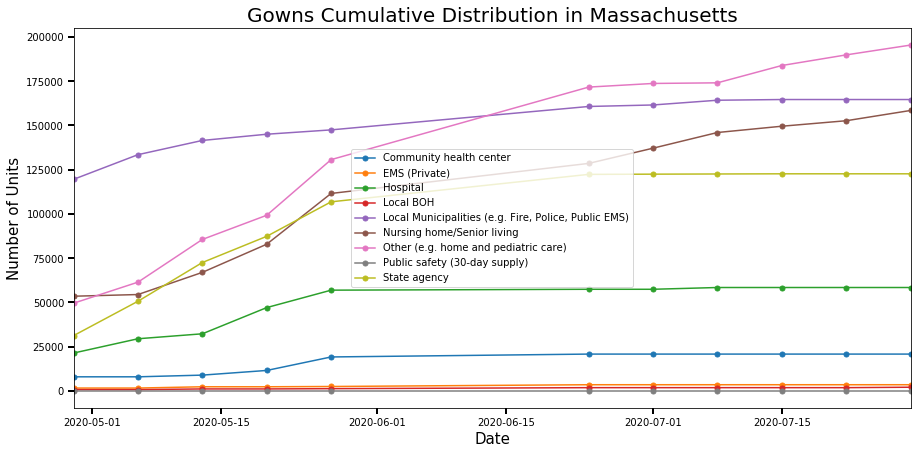

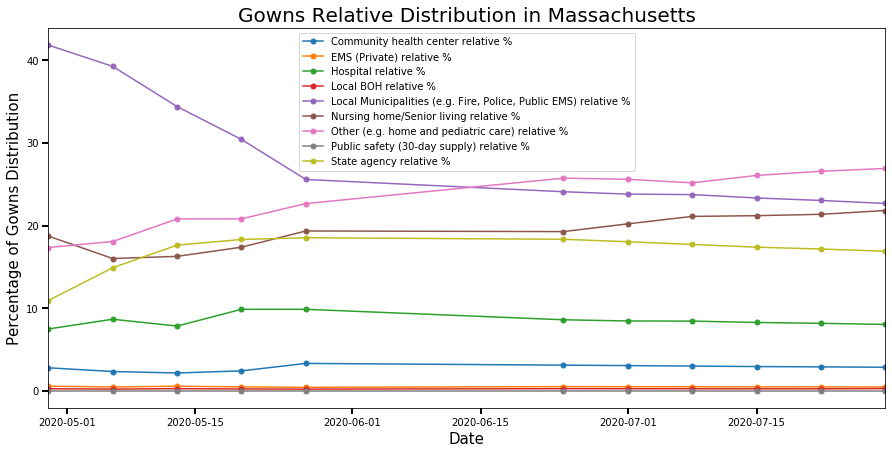

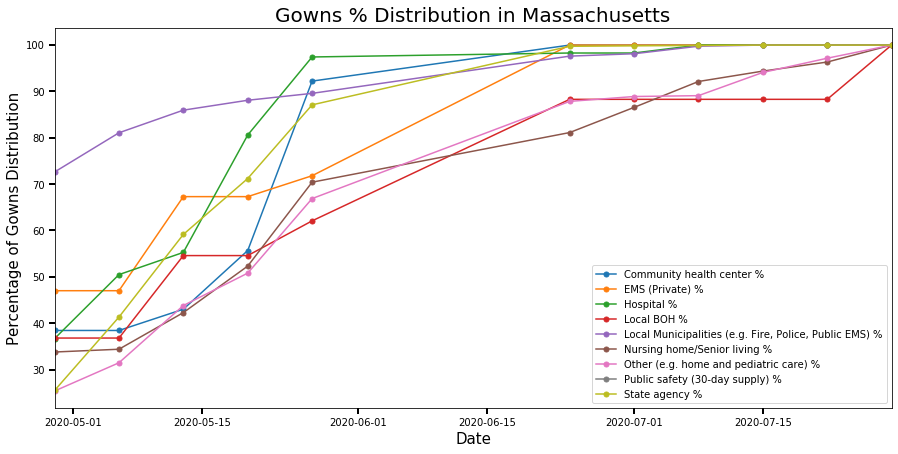

Entity,Community health center,EMS (Private),Hospital,Local BOH,"Local Municipalities (e.g. Fire, Police, Public EMS)",Nursing home/Senior living,Other (e.g. home and pediatric care),Public safety (30-day supply),State agency,Total,...,"Local Municipalities (e.g. Fire, Police, Public EMS) relative %","Local Municipalities (e.g. Fire, Police, Public EMS) %",Nursing home/Senior living relative %,Nursing home/Senior living %,Other (e.g. home and pediatric care) relative %,Other (e.g. home and pediatric care) %,Public safety (30-day supply) relative %,Public safety (30-day supply) %,State agency relative %,State agency %
Time,,,,,,,,,,,,,,,,,,,,,
2020-04-29,8013.0,1668.0,21436.0,786.0,119532.0,53525.0,49570.0,0.0,31265.0,285795.0,...,41.824385,72.618802,18.728459,33.785916,17.344600,25.374838,0.0,NaN,10.939660,25.489988
2020-05-06,8013.0,1668.0,29506.0,786.0,133457.0,54475.0,61466.0,0.0,50686.0,340057.0,...,39.245479,81.078602,16.019373,34.385573,18.075205,31.464390,0.0,NaN,14.905148,41.323702
2020-05-13,8969.0,2388.0,32306.0,1166.0,141492.0,66989.0,85588.0,0.0,72556.0,411454.0,...,34.388291,85.960073,16.281042,42.284629,20.801353,43.812420,0.0,NaN,17.634049,59.154057
2020-05-20,11609.0,2388.0,47106.0,1166.0,145007.0,82894.0,99247.0,0.0,87346.0,476763.0,...,30.414902,88.095527,17.386836,52.324143,20.816842,50.804449,0.0,NaN,18.320633,71.212171
2020-05-27,19229.0,2548.0,56946.0,1326.0,147457.0,111564.0,130664.0,0.0,106836.0,576570.0,...,25.574865,89.583966,19.349602,70.421148,22.662296,66.886783,0.0,NaN,18.529580,87.102139
2020-06-24,20849.0,3548.0,57446.0,1886.0,160677.0,128524.0,171624.0,0.0,122336.0,666890.0,...,24.093479,97.615460,19.272144,81.126597,25.734979,87.854170,0.0,NaN,18.344255,99.739108
2020-07-01,20849.0,3548.0,57446.0,1886.0,161527.0,137124.0,173674.0,0.0,122456.0,678510.0,...,23.806134,98.131857,20.209577,86.555067,25.596380,88.903563,0.0,NaN,18.047781,99.836942
2020-07-08,20849.0,3548.0,58446.0,1886.0,164202.0,145974.0,174034.0,0.0,122556.0,691495.0,...,23.745942,99.756990,21.109914,92.141342,25.167789,89.087847,0.0,NaN,17.723339,99.918471
2020-07-15,20849.0,3548.0,58446.0,1886.0,164602.0,149524.0,183811.0,0.0,122656.0,705322.0,...,23.337142,100.000000,21.199395,94.382164,26.060579,94.092684,0.0,NaN,17.390071,100.000000


In [7]:
# Gowns Distribution by Entities in MA
for entity in Entities:
    MA_Gowns['{} relative %'.format(entity)] = MA_Gowns[entity] / MA_Gowns['Total'] * 100
    MA_Gowns['{} %'.format(entity)] = MA_Gowns[entity] / MA_Gowns[entity].iloc[-1] * 100

fig1, ax1 = plt.subplots(1, 1, figsize=(15,7))
for entity in Entities:
    ax1.plot(MA_Gowns.index, entity, data=MA_Gowns, marker='.', markersize=10)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Units', fontsize=15)
ax1.set_xlim([datetime.date(2020,4,29), datetime.date(2020,7,29)])
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend()
ax1.set_title('Gowns Cumulative Distribution in Massachusetts', fontsize=20)

fig2, ax2 = plt.subplots(1, 1,figsize=(15,7))
for entity in Entities:
    ax2.plot(MA_Gowns.index, '{} relative %'.format(entity), data=MA_Gowns, marker='.', markersize=10)
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Percentage of Gowns Distribution', fontsize=15)
ax2.set_xlim([datetime.date(2020,4,29), datetime.date(2020,7,29)])
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend()
ax2.set_title('Gowns Relative Distribution in Massachusetts', fontsize=20)

fig3, ax3 = plt.subplots(1, 1,figsize=(15,7))
for entity in Entities:
    ax3.plot(MA_Gowns.index, '{} %'.format(entity), data=MA_Gowns, marker='.', markersize=10)
ax3.set_xlabel('Date', fontsize=15)
ax3.set_ylabel('Percentage of Gowns Distribution', fontsize=15)
ax3.set_xlim([datetime.date(2020,4,29), datetime.date(2020,7,29)])
ax3.tick_params(direction='out', length=6, width=2, labelsize=10)
ax3.legend()
ax3.set_title('Gowns % Distribution in Massachusetts', fontsize=20)
plt.show()
MA_Gowns    

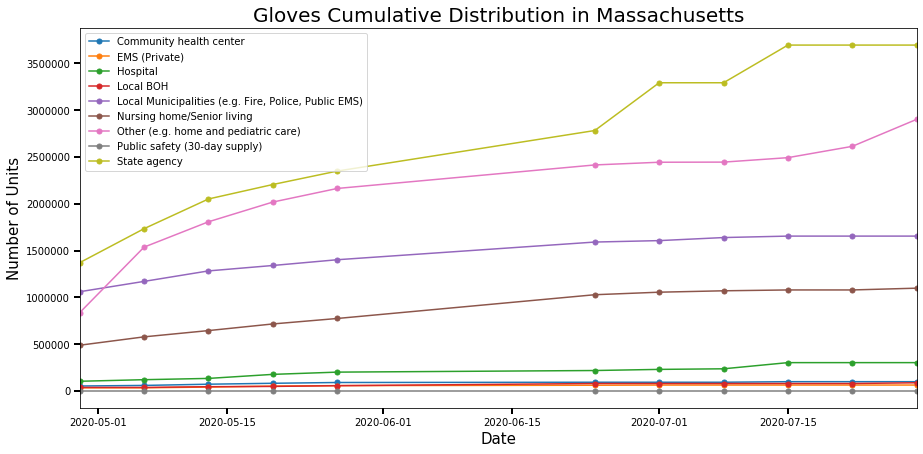

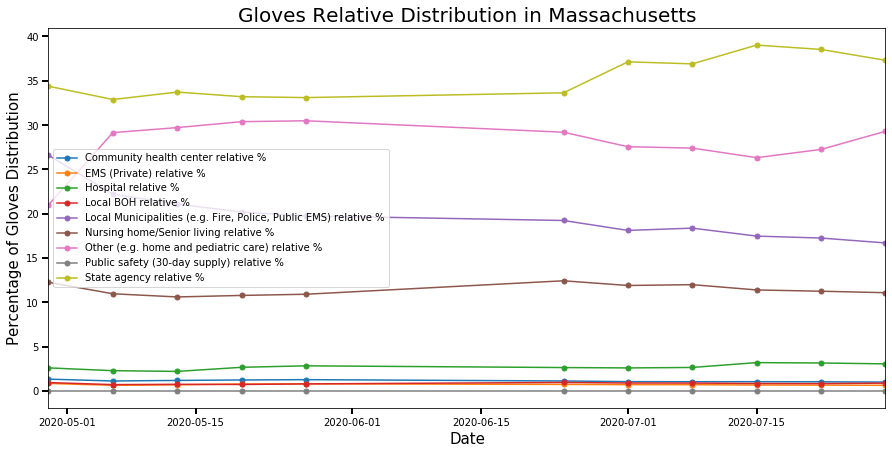

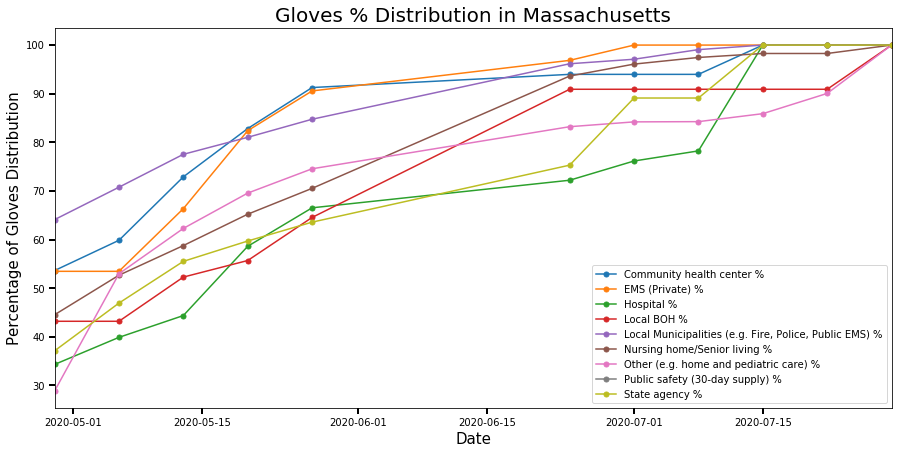

Entity,Community health center,EMS (Private),Hospital,Local BOH,"Local Municipalities (e.g. Fire, Police, Public EMS)",Nursing home/Senior living,Other (e.g. home and pediatric care),Public safety (30-day supply),State agency,Total,...,"Local Municipalities (e.g. Fire, Police, Public EMS) relative %","Local Municipalities (e.g. Fire, Police, Public EMS) %",Nursing home/Senior living relative %,Nursing home/Senior living %,Other (e.g. home and pediatric care) relative %,Other (e.g. home and pediatric care) %,Public safety (30-day supply) relative %,Public safety (30-day supply) %,State agency relative %,State agency %
Time,,,,,,,,,,,,,,,,,,,,,
2020-04-29,53400.0,34000.0,104000.0,38000.0,1060650.0,489100.0,837054.0,0.0,1371080.0,3987284.0,...,26.600814,64.091215,12.266495,44.520299,20.993087,28.839318,0.0,NaN,34.386314,37.099362
2020-05-06,59600.0,34000.0,120900.0,38000.0,1171050.0,578500.0,1537204.0,0.0,1734280.0,5273534.0,...,22.206171,70.762285,10.969873,52.657928,29.149409,52.961834,0.0,NaN,32.886486,46.927007
2020-05-13,72600.0,42200.0,134500.0,46000.0,1283050.0,645500.0,1807792.0,0.0,2051480.0,6083122.0,...,21.091966,77.530036,10.611328,58.756599,29.718161,62.284499,0.0,NaN,33.724130,55.509962
2020-05-20,82500.0,52400.0,177700.0,49000.0,1340922.0,716400.0,2018692.0,0.0,2206080.0,6643694.0,...,20.183380,81.027031,10.783158,65.210268,30.385084,69.550711,0.0,NaN,33.205623,59.693205
2020-05-27,90900.0,57600.0,201700.0,56800.0,1402422.0,774800.0,2163892.0,0.0,2349580.0,7097694.0,...,19.758840,84.743251,10.916222,70.526124,30.487254,74.553338,0.0,NaN,33.103428,63.576099
2020-06-24,93600.0,61600.0,218900.0,80000.0,1591307.0,1028600.0,2415142.0,0.0,2782797.0,8271946.0,...,19.237396,96.156884,12.434801,93.628254,29.196782,83.209743,0.0,NaN,33.641383,75.298300
2020-07-01,93600.0,63600.0,230900.0,80000.0,1606707.0,1055600.0,2443942.0,0.0,3293197.0,8867546.0,...,18.118959,97.087450,11.904083,96.085928,27.560522,84.202000,0.0,NaN,37.137637,89.108956
2020-07-08,93600.0,63600.0,237200.0,80000.0,1639407.0,1070600.0,2445342.0,0.0,3293197.0,8922946.0,...,18.372934,99.063391,11.998279,97.451302,27.405097,84.250235,0.0,NaN,36.907060,89.108956
2020-07-15,99600.0,63600.0,303200.0,80000.0,1654907.0,1079600.0,2492942.0,0.0,3695697.0,9469546.0,...,17.476097,100.000000,11.400758,98.270526,26.325887,85.890214,0.0,NaN,39.027183,100.000000


In [8]:
# Gloves Distribution by Entities in MA
for entity in Entities:
    MA_Gloves['{} relative %'.format(entity)] = MA_Gloves[entity] / MA_Gloves['Total'] * 100
    MA_Gloves['{} %'.format(entity)] = MA_Gloves[entity] / MA_Gloves[entity].iloc[-1] * 100

fig1, ax1 = plt.subplots(1, 1, figsize=(15,7))
for entity in Entities:
    ax1.plot(MA_Gloves.index, entity, data=MA_Gloves, marker='.', markersize=10)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Units', fontsize=15)
ax1.set_xlim([datetime.date(2020,4,29), datetime.date(2020,7,29)])
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend()
ax1.set_title('Gloves Cumulative Distribution in Massachusetts', fontsize=20)

fig2, ax2 = plt.subplots(1, 1,figsize=(15,7))
for entity in Entities:
    ax2.plot(MA_Gloves.index, '{} relative %'.format(entity), data=MA_Gloves, marker='.', markersize=10)
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Percentage of Gloves Distribution', fontsize=15)
ax2.set_xlim([datetime.date(2020,4,29), datetime.date(2020,7,29)])
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend()
ax2.set_title('Gloves Relative Distribution in Massachusetts', fontsize=20)

fig3, ax3 = plt.subplots(1, 1,figsize=(15,7))
for entity in Entities:
    ax3.plot(MA_Gloves.index, '{} %'.format(entity), data=MA_Gloves, marker='.', markersize=10)
ax3.set_xlabel('Date', fontsize=15)
ax3.set_ylabel('Percentage of Gloves Distribution', fontsize=15)
ax3.set_xlim([datetime.date(2020,4,29), datetime.date(2020,7,29)])
ax3.tick_params(direction='out', length=6, width=2, labelsize=10)
ax3.legend()
ax3.set_title('Gloves % Distribution in Massachusetts', fontsize=20)
plt.show()
MA_Gloves  

Text(0.5, 1.0, 'Cumulative PPE Distribution to Hospitals in MA')

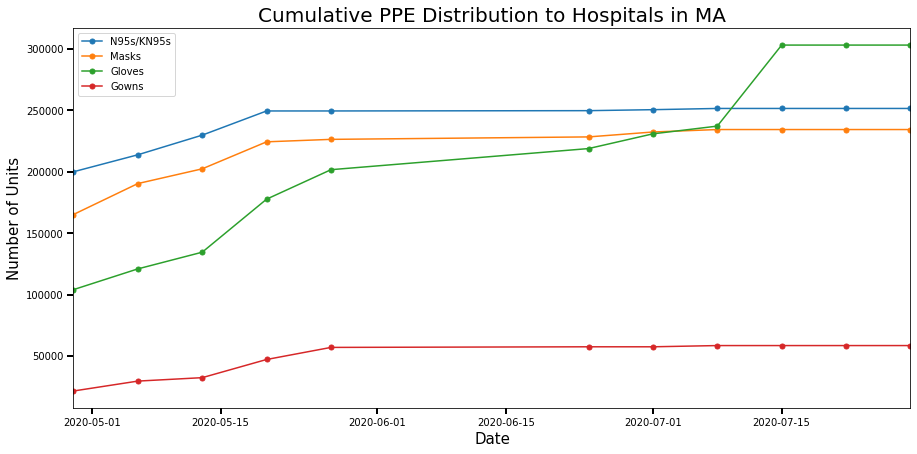

In [22]:
# PPE distribution to Hospitals

fig3, ax3 = plt.subplots(1, 1,figsize=(15,7))
dataset = [MA_N95, MA_Masks, MA_Gloves, MA_Gowns]
ppes = ['N95s/KN95s', 'Masks', 'Gloves', 'Gowns']
i = 0
for df in dataset:
    ax3.plot(df.index, 'Hospital', data=df, marker='.', markersize=10, label=ppes[i])
    i += 1
ax3.set_xlabel('Date', fontsize=15)
ax3.set_ylabel('Number of Units', fontsize=15)
ax3.set_xlim([datetime.date(2020,4,29), datetime.date(2020,7,29)])
ax3.tick_params(direction='out', length=6, width=2, labelsize=10)
ax3.legend()
ax3.set_title('Cumulative PPE Distribution to Hospitals in MA', fontsize=20)

Text(0.5, 1.0, 'Cumulative PPE Distribution to Other (e.g. home and pediatric care) in MA')

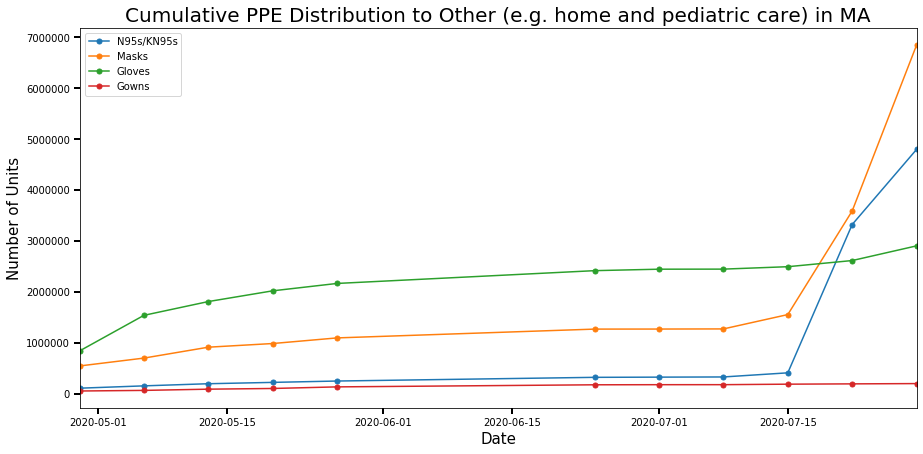

In [24]:
# PPE distribution to Other (e.g. home and pediatric care)

fig4, ax4 = plt.subplots(1, 1,figsize=(15,7))
dataset = [MA_N95, MA_Masks, MA_Gloves, MA_Gowns]
ppes = ['N95s/KN95s', 'Masks', 'Gloves', 'Gowns']
i = 0
for df in dataset:
    ax4.plot(df.index, 'Other (e.g. home and pediatric care)', data=df, marker='.', markersize=10, label=ppes[i])
    i += 1
ax4.set_xlabel('Date', fontsize=15)
ax4.set_ylabel('Number of Units', fontsize=15)
ax4.set_xlim([datetime.date(2020,4,29), datetime.date(2020,7,29)])
ax4.tick_params(direction='out', length=6, width=2, labelsize=10)
ax4.legend()
ax4.set_title('Cumulative PPE Distribution to Other (e.g. home and pediatric care) in MA', fontsize=20)

Text(0.5, 1.0, 'Cumulative PPE Distribution to Local Municipalities (e.g. Fire, Police, Public EMS) in MA')

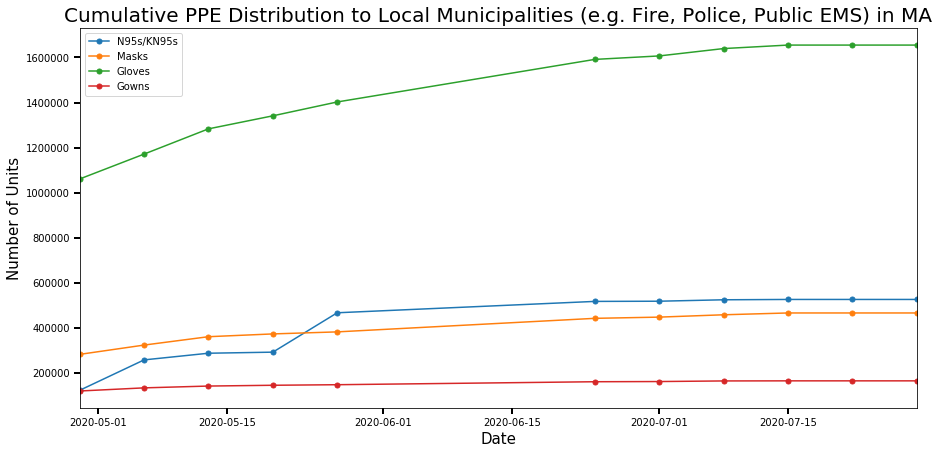

In [25]:
# PPE distribution to Local Municipalities (e.g. Fire, Police, Public EMS)

fig4, ax4 = plt.subplots(1, 1,figsize=(15,7))
dataset = [MA_N95, MA_Masks, MA_Gloves, MA_Gowns]
ppes = ['N95s/KN95s', 'Masks', 'Gloves', 'Gowns']
i = 0
for df in dataset:
    ax4.plot(df.index, 'Local Municipalities (e.g. Fire, Police, Public EMS)', data=df, marker='.', markersize=10, label=ppes[i])
    i += 1
ax4.set_xlabel('Date', fontsize=15)
ax4.set_ylabel('Number of Units', fontsize=15)
ax4.set_xlim([datetime.date(2020,4,29), datetime.date(2020,7,29)])
ax4.tick_params(direction='out', length=6, width=2, labelsize=10)
ax4.legend()
ax4.set_title('Cumulative PPE Distribution to Local Municipalities (e.g. Fire, Police, Public EMS) in MA', fontsize=20)